In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
reuters = tf.keras.datasets.reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 1000)

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [5]:
words = reuters.get_word_index()
#words
rev_words = dict([value, key] for [key, value] in words.items())
#rev_words
decoded_words = " ".join([rev_words.get(i - 3, "?") for i in train_data[0]])
decoded_words

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
def vetorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vetorize_sequence(train_data)
x_test = vetorize_sequence(test_data)

In [8]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
x_train.shape

(8982, 10000)

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8982, 10000)
(8982, 46)
(2246, 10000)
(2246, 46)


In [17]:
model = Sequential()
model.add(Dense(64, activation = "relu", input_shape = (10000,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(46, activation = "softmax"))

In [18]:
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["acc"])

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 306us/sample - loss: 2.6873 - acc: 0.5100 - val_loss: 1.8223 - val_acc: 0.6230
Epoch 2/20
7982/7982 [==============================] - 1s 177us/sample - loss: 1.5846 - acc: 0.6630 - val_loss: 1.4304 - val_acc: 0.6720
Epoch 3/20
7982/7982 [==============================] - 1s 177us/sample - loss: 1.3169 - acc: 0.7071 - val_loss: 1.2818 - val_acc: 0.6990
Epoch 4/20
7982/7982 [==============================] - 1s 171us/sample - loss: 1.1684 - acc: 0.7393 - val_loss: 1.2130 - val_acc: 0.7300
Epoch 5/20
7982/7982 [==============================] - 1s 178us/sample - loss: 1.0625 - acc: 0.7610 - val_loss: 1.1244 - val_acc: 0.7470
Epoch 6/20
7982/7982 [==============================] - 1s 180us/sample - loss: 0.9636 - acc: 0.7859 - val_loss: 1.0940 - val_acc: 0.7540
Epoch 7/20
7982/7982 [==============================] - 1s 177us/sample - loss: 0.8888 - acc: 0.7997 - val_loss: 1.0388 - va

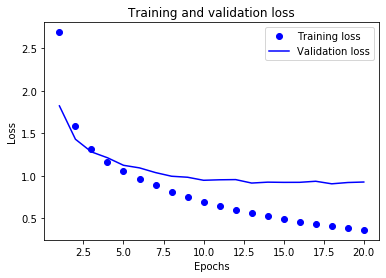

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

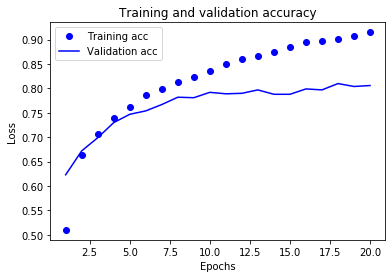

In [22]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model = Sequential()
model.add(Dense(64, activation = "relu", input_shape = (10000,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(46, activation = "softmax"))

model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["acc"])

history = model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 291us/sample - loss: 2.7731 - acc: 0.5036 - val_loss: 1.9219 - val_acc: 0.5950
Epoch 2/9
7982/7982 [==============================] - 1s 164us/sample - loss: 1.6553 - acc: 0.6493 - val_loss: 1.4617 - val_acc: 0.6630
Epoch 3/9
7982/7982 [==============================] - 2s 193us/sample - loss: 1.3306 - acc: 0.7093 - val_loss: 1.2658 - val_acc: 0.7090
Epoch 4/9
7982/7982 [==============================] - 2s 204us/sample - loss: 1.1539 - acc: 0.7469 - val_loss: 1.1424 - val_acc: 0.7470
Epoch 5/9
7982/7982 [==============================] - 2s 190us/sample - loss: 1.0306 - acc: 0.7730 - val_loss: 1.0746 - val_acc: 0.7680
Epoch 6/9
7982/7982 [==============================] - 1s 171us/sample - loss: 0.9345 - acc: 0.7890 - val_loss: 1.0291 - val_acc: 0.7660
Epoch 7/9
7982/7982 [==============================] - 1s 179us/sample - loss: 0.8581 - acc: 0.8019 - val_loss: 0.9849 - val_acc: 

In [24]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 173us/sample - loss: 1.0132 - acc: 0.7560


[1.0131674942329114, 0.7560107]

In [28]:
predictions = model.predict(x_test)

In [32]:
predictions[0]

array([2.6218542e-05, 2.2786007e-04, 1.3607003e-04, 9.6096539e-01,
       2.1601131e-02, 2.3917239e-05, 5.5940705e-04, 5.1675030e-05,
       6.2679574e-03, 5.3834574e-05, 1.1813494e-04, 7.7783759e-04,
       2.3229061e-04, 1.2596355e-04, 2.4042283e-05, 8.9280184e-06,
       1.2644065e-03, 1.5433760e-04, 3.6655422e-04, 7.6794351e-04,
       2.0818189e-03, 1.0045137e-03, 2.7249725e-06, 1.3638168e-04,
       4.5465225e-05, 4.8546327e-04, 2.6520238e-05, 9.9363351e-05,
       1.4996366e-04, 1.4387190e-04, 2.2647399e-04, 7.5646451e-05,
       1.2477071e-04, 6.2633885e-06, 3.0521915e-04, 1.2787759e-05,
       9.0649660e-04, 1.0608858e-05, 2.0195417e-05, 1.8564615e-04,
       3.7970738e-05, 7.5768759e-05, 4.2383261e-05, 2.1132972e-05,
       1.5892389e-05, 2.6071546e-06], dtype=float32)

In [34]:
np.sum(predictions[0])

0.9999999

In [35]:
np.argmax(predictions[0])

3